In [2]:
# 필요한 오픈소스 import 진행
import pandas as pd
from urllib.parse import quote
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 전처리를 완료한 train 데이터를 Github에서 불러와 변수들의 상관계수 파악

In [3]:
# 깃허브에서 3개 구의 21,22년도 데이터를 불러옴
github_csv_url = 'https://github.com/Mireu707/Capstone/raw/main/Data/송파구_21.22년도.csv'
encoded_url = quote(github_csv_url, safe=':/')
dfs = pd.read_csv(encoded_url)

github_csv_url = 'https://github.com/Mireu707/Capstone/raw/main/Data/영등포구_21.22년도.csv'
encoded_url = quote(github_csv_url, safe=':/')
dfy = pd.read_csv(encoded_url)

github_csv_url = 'https://github.com/Mireu707/Capstone/raw/main/Data/강서구_21.22년도.csv'
encoded_url = quote(github_csv_url, safe=':/')
dfg = pd.read_csv(encoded_url)

In [4]:
# 상관계수를 표로 보일 때 한글 폰트가 깨져 변수명을 영문으로 변경
dfs = dfs.rename(columns={
    '대여일자': 'date',
    '평일/주말': 'weekday',
    '평균온도': 'temp',
    '풍속': 'windspeed',
    '풍향': 'windirect',
    '미세먼지(㎍/㎥)': 'fine dust ',
    '초미세먼지(㎍/㎥)':'ultrafine dust',
    '강수량':'rain',
    '이용건수':'using'
})
dfy = dfy.rename(columns={
    '대여일자': 'date',
    '평일/주말': 'weekday',
    '평균온도': 'temp',
    '풍속': 'windspeed',
    '풍향': 'windirect',
    '미세먼지(㎍/㎥)': 'fine dust ',
    '초미세먼지(㎍/㎥)':'ultrafine dust',
    '강수량':'rain',
    '이용건수':'using'
})
dfg = dfg.rename(columns={
    '대여일자': 'date',
    '평일/주말': 'weekday',
    '평균온도': 'temp',
    '풍속': 'windspeed',
    '풍향': 'windirect',
    '미세먼지(㎍/㎥)': 'fine dust ',
    '초미세먼지(㎍/㎥)':'ultrafine dust',
    '강수량':'rain',
    '이용건수':'using'
})

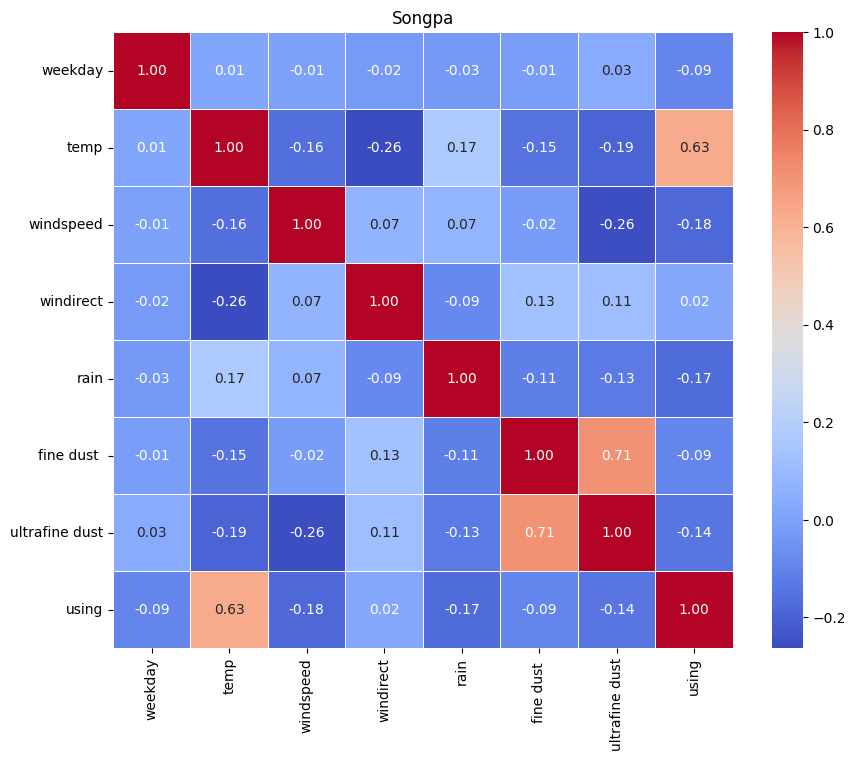

In [5]:
columns_of_interest = ['weekday', 'temp', 'windspeed', 'windirect', 'rain', 'fine dust ','ultrafine dust', 'using']

#필요한 변수들만 선택
df_selected = dfs[columns_of_interest]

# 상관계수 표 만들기
correlation_matrix = df_selected.corr()

#히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Songpa')
plt.show()

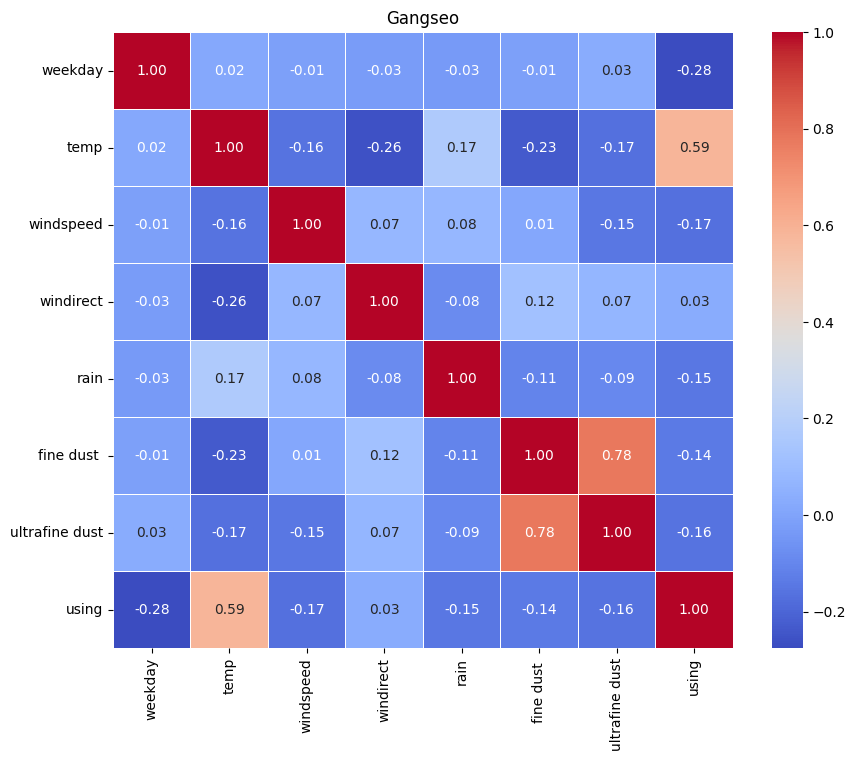

In [6]:
columns_of_interest = ['weekday', 'temp', 'windspeed', 'windirect', 'rain', 'fine dust ','ultrafine dust', 'using']

#필요한 변수들만 선택
df_selected = dfg[columns_of_interest]

# 상관계수 표 만들기
correlation_matrix = df_selected.corr()

#히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Gangseo')
plt.show()

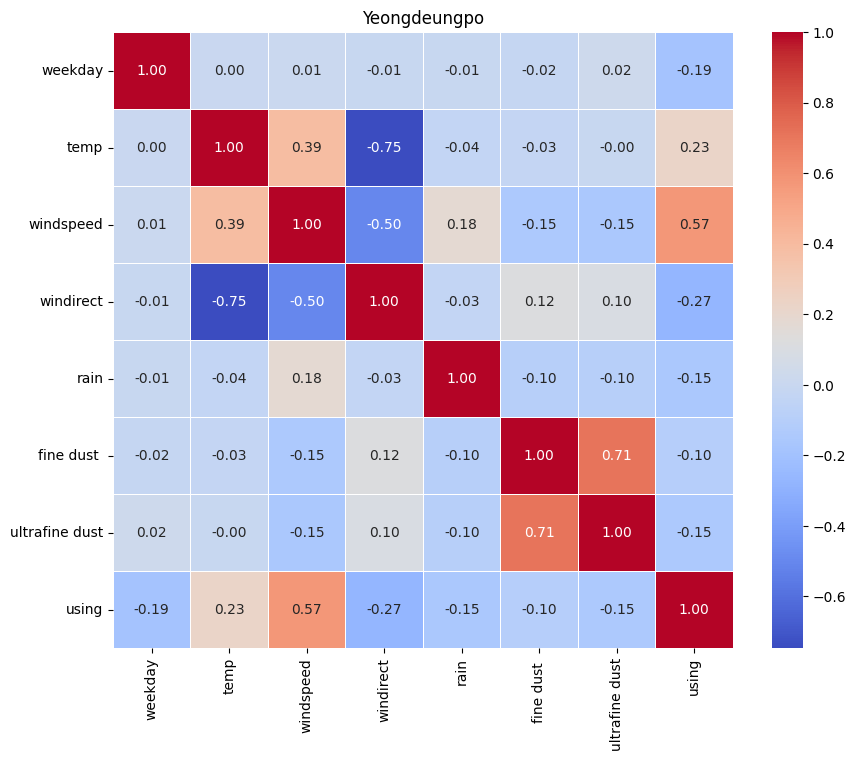

In [7]:
columns_of_interest = ['weekday', 'temp', 'windspeed', 'windirect', 'rain', 'fine dust ','ultrafine dust', 'using']

#필요한 변수들만 선택
df_selected = dfy[columns_of_interest]

# 상관계수 표 만들기
correlation_matrix = df_selected.corr()

#히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Yeongdeungpo')
plt.show()

### 상관계수 값이 높을것으로 예상한 **평일/주말** 여부가 낮은 값을 보여 확인해보고자 시각화 진행
###(파란 선: 평일 대여건수, 빨간 점: 주말 대여건수)

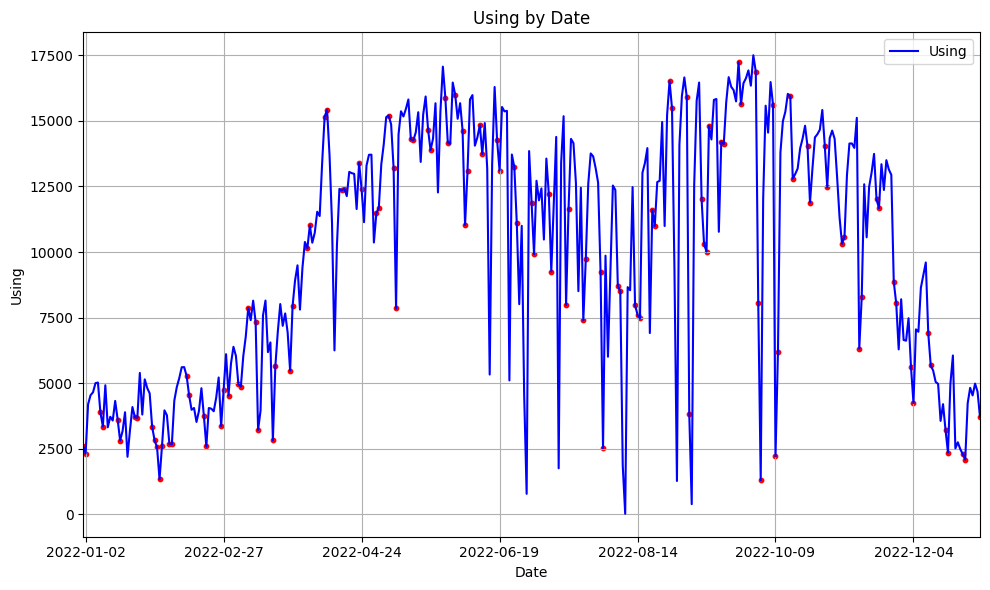

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime

# 날짜를 datetime 형식으로 변환
dfs['date'] = pd.to_datetime(dfs['date'])
dfs = dfs.sort_values(by='date')

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(dfs['date'], dfs['using'], label='Using', color='blue')

# weekday가 1인 행에 빨간색 작은 크기의 점 찍기
for index, row in dfs[dfs['weekday'] == 1].iterrows():
    plt.scatter(row['date'], row['using'], color='red', s=10)

# 그래프 스타일과 레이블 설정
plt.title('Using by Date')
plt.xlabel('Date')
plt.ylabel('Using')
plt.legend()
plt.grid(True)

# x축의 범위를 데이터의 처음 값부터 끝 값까지로 설정
plt.xlim(datetime(2022, 1, 1), datetime(2022, 12, 31))

# x축 눈금 간격 조절 (2달 간격)
plt.xticks(pd.date_range(start=datetime(2022, 1, 1), end=datetime(2022, 12, 31), freq='8W'))

plt.tight_layout()

# 그래프 보여주기
plt.show()

###수집한 변수 데이터의 상관계수 값이 낮을것으로 예상하지 못하였고, 추가적인 변수를 찾기에는 수집할 수 있는 데이터가 마땅치 않으며 시간적 여유가 없다고 판단, 표에 명시되어있는 모든 변수를 사용하기로 결정하였다

#**송파구 데이터 모델학습 진행**

**Train Set: 송파구 21,22년도 데이터 / Test Set: 송파구 23년도 데이터**

Train Set인 [송파구 21,22년도 데이터]를 모델에 적용해 학습을 진행한다

Test Set인 [송파구 23년도 데이터]를 학습한 모델의 예측값과 정밀 비교한다.

In [10]:
# 필요한 라이브러리 import
from urllib.parse import quote
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
file_path_train = 'https://github.com/Mireu707/Capstone/raw/main/Data/송파구_21.22년도.csv'
encoded_url1 = quote(file_path_train, safe=':/')
data_train = pd.read_csv(encoded_url1)

file_path_test = 'https://github.com/Mireu707/Capstone/raw/main/Data/송파구_23년도.csv'
encoded_url2 = quote(file_path_test, safe=':/')
data_test = pd.read_csv(encoded_url2, encoding='utf-8')

In [11]:
# 피처와 타겟 변수 분리
columns_to_drop = ['대여일자', '이용건수']  # 삭제해야 하는 열의 이름들을 리스트로 지정
X_train = data_train.drop(columns_to_drop, axis=1)
y_train = data_train['이용건수']

columns_to_drop = ['대여일자', '이용건수']  # 삭제해야 하는 열의 이름들을 리스트로 지정
X_test = data_test.drop(columns_to_drop, axis=1)
y_test = data_test['이용건수']

### 총 8개의 모델을 이용하여 MSE, R-squared 값 체크

(Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting gressor, Support Vector Regressor, K-Nearest Neighbors Regressor)

(MSE: 값이 작을수록 좋은 정확도를 보임 / R-squared: 1에 가까울수록 좋은 정확도를 보임)

In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# GradientBoosting Regressor 모델 외 다른 모델 리스트 생성
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# 모든 모델에 대한 학습 및 평가
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # 모델 학습
    model.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error on Test Set for {model_name}: {mse}\n")
    print(f"R-squared on Test Set for {model_name}: {r2}\n")

Training Linear Regression...
Mean Squared Error on Test Set for Linear Regression: 11641998.24853684

R-squared on Test Set for Linear Regression: 0.4457073838501847

Training Ridge Regression...
Mean Squared Error on Test Set for Ridge Regression: 11547997.099052146

R-squared on Test Set for Ridge Regression: 0.4501829164826955

Training Lasso Regression...
Mean Squared Error on Test Set for Lasso Regression: 11629920.999330772

R-squared on Test Set for Lasso Regression: 0.44628239940296277

Training Decision Tree Regressor...
Mean Squared Error on Test Set for Decision Tree Regressor: 18056372.96336996

R-squared on Test Set for Decision Tree Regressor: 0.1403095933895201

Training Random Forest Regressor...
Mean Squared Error on Test Set for Random Forest Regressor: 9371448.306591941

R-squared on Test Set for Random Forest Regressor: 0.55381159762445

Training Gradient Boosting Regressor...
Mean Squared Error on Test Set for Gradient Boosting Regressor: 9232793.14734154

R-squar

## ◆  8개의 모델이 모두 낮은 정확도를 보임

→ 21,22,23년도 데이터를 모두 합쳐 7:3으로 Split시켜 학습을 진행하기로 변경

In [98]:
file_path = 'https://github.com/Mireu707/Capstone/raw/main/Data/송파구 통합.csv'
encoded_url = quote(file_path, safe=':/')
df = pd.read_csv(encoded_url)

In [99]:
# 필요한 라이브러리 import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# 독립변수와 종속변수 지정
X = df[['평일/주말', '평균온도', '풍속', '풍향', '강수량', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]
y = df['이용건수']

# Train과 Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
# 1. 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor()

# 모델 훈련
rf_model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 9534110.818196338
R-squared: 0.5460669968109229


In [101]:
# 2. 선형 회귀 모델
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
print(f'Linear Regression MSE: {linear_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, linear_y_pred)
print(f'R-squared: {r2}')

Linear Regression MSE: 11641998.24853684
R-squared: 0.4457073838501847


In [93]:
# 3. 서포트 벡터 머신 회귀 모델
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_y_pred)
print(f'SVM MSE: {svm_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, svm_y_pred)
print(f'R-squared: {r2}')

SVM MSE: 21024642.796463307
R-squared: -0.00101408800088576


In [102]:
# 4. DecisionTree Regressor 모델
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
print(f'DecisionTree Regressor MSE: {dt_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, dt_y_pred)
print(f'R-squared: {r2}')

DecisionTree Regressor MSE: 19250435.02197802
R-squared: 0.08345854701573485


In [103]:
# 5. GradientBoosting Regressor 모델
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'GradientBoosting Regressor MSE: {gb_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, gb_y_pred)
print(f'R-squared: {r2}')

GradientBoosting Regressor MSE: 9266115.949638736
R-squared: 0.5588266256681242


### **GradientBoosting Regressor 모델**이 5개의 모델을 돌려본 결과 R-squared 값이 제일 높게 나와 하이퍼파라미터 미세조정을 통해 정확도를 높여보기로 하였음.

GradientBoosting Regressor 모델 최적의 하이퍼파라미터 탐색

In [104]:
from sklearn.model_selection import GridSearchCV

# GradientBoosting Regressor의 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# GradientBoosting Regressor 모델 생성
gb_model = GradientBoostingRegressor()

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [105]:
# 5. GradientBoosting Regressor 모델
gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=50)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'GradientBoosting Regressor MSE: {gb_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, gb_y_pred)
print(f'R-squared: {r2}')

GradientBoosting Regressor MSE: 9588376.13371929
R-squared: 0.5434833455282753


추가로 GradientBoosting Regressor 모델 정확도에 근접한 RandomForestRegressor 모델의 최적 하이퍼파라미터를 구해보기로 함

In [106]:
from sklearn.model_selection import GridSearchCV

# RandomForestRegressor를 예로 들어서
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [107]:
# 1. 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42)

# 모델 훈련
rf_model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 9498732.63264285
R-squared: 0.5477514041271274


※ 하이퍼파라미터 튜닝을 진행한 결과 정확도가 더 낮아지는 경우가 있음
데이터 부족에 의한 영향으로 추정

#**영등포구 데이터 모델학습 진행**

송파구와 동일한 작업 진행

**Train Set: 영등포구 21,22년도 데이터 / Test Set: 영등포구 23년도 데이터**

Train Set인 [영등포구 21,22년도 데이터]를 모델에 적용해 학습을 진행한다

Test Set인 [영등포구 23년도 데이터]를 학습한 모델의 예측값과 정밀 비교한다.

In [108]:
# 데이터 불러오기
file_path_train = 'https://github.com/Mireu707/Capstone/raw/main/Data/영등포구_21.22년도.csv'
encoded_url = quote(file_path_train, safe=':/')
data_train = pd.read_csv(encoded_url)
file_path_test = 'https://github.com/Mireu707/Capstone/raw/main/Data/영등포구_23년도.csv'
encoded_url = quote(file_path_test, safe=':/')
data_test = pd.read_csv(encoded_url)

In [109]:
# 피처와 타겟 변수 분리
columns_to_drop = ['대여일자', '이용건수']  # 삭제해야 하는 열의 이름들을 리스트로 지정
X_train = data_train.drop(columns_to_drop, axis=1)
y_train = data_train['이용건수']

columns_to_drop = ['대여일자', '이용건수']  # 삭제해야 하는 열의 이름들을 리스트로 지정
X_test = data_test.drop(columns_to_drop, axis=1)
y_test = data_test['이용건수']

In [110]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# GradientBoosting Regressor 모델 외 다른 모델 리스트 생성
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# 모든 모델에 대한 학습 및 평가
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # 모델 학습
    model.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error on Test Set for {model_name}: {mse}\n")
    print(f"R-squared on Test Set for {model_name}: {r2}\n")

Training Linear Regression...
Mean Squared Error on Test Set for Linear Regression: 26044521.12140785

R-squared on Test Set for Linear Regression: -0.2257413586047552

Training Ridge Regression...
Mean Squared Error on Test Set for Ridge Regression: 26321658.205631863

R-squared on Test Set for Ridge Regression: -0.2387843469765889

Training Lasso Regression...
Mean Squared Error on Test Set for Lasso Regression: 26065755.971307755

R-squared on Test Set for Lasso Regression: -0.22674074091801577

Training Decision Tree Regressor...
Mean Squared Error on Test Set for Decision Tree Regressor: 21532218.099447515

R-squared on Test Set for Decision Tree Regressor: -0.013377444874440814

Training Random Forest Regressor...
Mean Squared Error on Test Set for Random Forest Regressor: 18883842.552026518

R-squared on Test Set for Random Forest Regressor: 0.11126387321541731

Training Gradient Boosting Regressor...
Mean Squared Error on Test Set for Gradient Boosting Regressor: 18025540.17366

## ◆  8개의 모델이 모두 낮은 정확도를 보임

→ 21,22,23년도 데이터를 모두 합쳐 7:3으로 Split시켜 학습을 진행하기로 변경

In [111]:
file_path = 'https://github.com/Mireu707/Capstone/raw/main/Data/영등포구 통합.csv'
encoded_url = quote(file_path, safe=':/')
df = pd.read_csv(encoded_url)

In [112]:
# 필요한 라이브러리 import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# 독립변수와 종속변수 지정
X = df[['평일/주말', '평균온도', '풍속', '풍향', '강수량', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]
y = df['이용건수']

# Train과 Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
# 1. 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor()

# 모델 훈련
rf_model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 5392273.4572927
R-squared: 0.6921479513090948


In [114]:
# 2. 선형 회귀 모델
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
print(f'Linear Regression MSE: {linear_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, linear_y_pred)
print(f'R-squared: {r2}')

Linear Regression MSE: 11876266.483388677
R-squared: 0.3219681834262961


In [115]:
# 3. 서포트 벡터 머신 회귀 모델
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_y_pred)
print(f'SVM MSE: {svm_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, svm_y_pred)
print(f'R-squared: {r2}')

SVM MSE: 17853874.350311488
R-squared: -0.01930138360841771


In [116]:
# 4. DecisionTree Regressor 모델
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
print(f'DecisionTree Regressor MSE: {dt_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, dt_y_pred)
print(f'R-squared: {r2}')

DecisionTree Regressor MSE: 8990616.868613139
R-squared: 0.4867137499760287


In [120]:
# 5. GradientBoosting Regressor 모델
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'GradientBoosting Regressor MSE: {gb_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, gb_y_pred)
print(f'R-squared: {r2}')

GradientBoosting Regressor MSE: 5581015.917868341
R-squared: 0.6813723937222312


### **RandomForestRegressor 모델**이 5개의 모델을 돌려본 결과 R-squared 값이 제일 높게 나와 하이퍼파라미터 미세조정을 통해 정확도를 높여보기로 하였음.

In [118]:
from sklearn.model_selection import GridSearchCV

# RandomForestRegressor를 예로 들어서
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [124]:
#  랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100)

# 모델 훈련
rf_model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 5088414.878497151
R-squared: 0.709495640875544


Mean Squared Error, R-squared값이 조금은 정확해진것을 확인할 수 있다

#**강서구 데이터 모델학습 진행**

송파구와 동일한 작업 진행

In [126]:
# 데이터 불러오기
file_path_train = 'https://github.com/Mireu707/Capstone/raw/main/Data/강서구_21.22년도.csv'
encoded_url = quote(file_path_train, safe=':/')
data_train = pd.read_csv(encoded_url)
file_path_test = 'https://github.com/Mireu707/Capstone/raw/main/Data/강서구_23년도.csv'
encoded_url = quote(file_path_test, safe=':/')
data_test = pd.read_csv(encoded_url)

In [127]:
# 피처와 타겟 변수 분리
columns_to_drop = ['대여일자', '이용건수']  # 삭제해야 하는 열의 이름들을 리스트로 지정
X_train = data_train.drop(columns_to_drop, axis=1)
y_train = data_train['이용건수']

columns_to_drop = ['대여일자', '이용건수']  # 삭제해야 하는 열의 이름들을 리스트로 지정
X_test = data_test.drop(columns_to_drop, axis=1)
y_test = data_test['이용건수']

In [128]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# GradientBoosting Regressor 모델 외 다른 모델 리스트 생성
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# 모든 모델에 대한 학습 및 평가
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # 모델 학습
    model.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # 평가 지표 계산
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error on Test Set for {model_name}: {mse}\n")
    print(f"R-squared on Test Set for {model_name}: {r2}\n")

Training Linear Regression...
Mean Squared Error on Test Set for Linear Regression: 22589577.962247454

R-squared on Test Set for Linear Regression: 0.4117205194432596

Training Ridge Regression...
Mean Squared Error on Test Set for Ridge Regression: 23088930.506658297

R-squared on Test Set for Ridge Regression: 0.3987163430955811

Training Lasso Regression...
Mean Squared Error on Test Set for Lasso Regression: 22618617.500962816

R-squared on Test Set for Lasso Regression: 0.4109642696018668

Training Decision Tree Regressor...
Mean Squared Error on Test Set for Decision Tree Regressor: 33115736.988950275

R-squared on Test Set for Decision Tree Regressor: 0.13759749798463738

Training Random Forest Regressor...
Mean Squared Error on Test Set for Random Forest Regressor: 22367310.926954698

R-squared on Test Set for Random Forest Regressor: 0.41750881421731134

Training Gradient Boosting Regressor...
Mean Squared Error on Test Set for Gradient Boosting Regressor: 21376537.963446245


## ◆  8개의 모델이 모두 높지 않은 정확도를 보임

→ 21,22,23년도 데이터를 모두 합쳐 7:3으로 Split시켜 학습을 진행하기로 변경

In [151]:
file_path = 'https://github.com/Mireu707/Capstone/raw/main/Data/강서구 통합.csv'
encoded_url = quote(file_path, safe=':/')
df = pd.read_csv(encoded_url)

In [152]:
# 필요한 라이브러리 import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# 독립변수와 종속변수 지정
X = df[['평일/주말', '평균온도', '풍속', '풍향', '강수량', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]
y = df['이용건수']

# Train과 Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [153]:
# 1. 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor()

# 모델 훈련
rf_model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 12015266.108366057
R-squared: 0.6397329753101678


In [154]:
# 2. 선형 회귀 모델
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
print(f'Linear Regression MSE: {linear_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, linear_y_pred)
print(f'R-squared: {r2}')

Linear Regression MSE: 16045733.552337855
R-squared: 0.5188830081889307


In [155]:
# 3. 서포트 벡터 머신 회귀 모델
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_y_pred)
print(f'SVM MSE: {svm_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, svm_y_pred)
print(f'R-squared: {r2}')

SVM MSE: 33355097.74156068
R-squared: -0.0001228198536127323


In [156]:
# 4. DecisionTree Regressor 모델
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
print(f'DecisionTree Regressor MSE: {dt_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, dt_y_pred)
print(f'R-squared: {r2}')

DecisionTree Regressor MSE: 22802726.39051095
R-squared: 0.31628061189542367


In [157]:
# 5. GradientBoosting Regressor 모델
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'GradientBoosting Regressor MSE: {gb_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, gb_y_pred)
print(f'R-squared: {r2}')

GradientBoosting Regressor MSE: 11621411.911504079
R-squared: 0.6515423416933452


### **GradientBoosting Regressor 모델**이 5개의 모델을 돌려본 결과 R-squared 값이 제일 높게 나와 하이퍼파라미터 미세조정을 통해 정확도를 높여보기로 하였음.

In [145]:
from sklearn.model_selection import GridSearchCV

# GradientBoosting Regressor의 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# GradientBoosting Regressor 모델 생성
gb_model = GradientBoostingRegressor()

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [158]:
# 5. GradientBoosting Regressor 모델
gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'GradientBoosting Regressor MSE: {gb_mse}')

from sklearn.metrics import r2_score

# 모델 성능 평가
r2 = r2_score(y_test, gb_y_pred)
print(f'R-squared: {r2}')

GradientBoosting Regressor MSE: 11598521.084291574
R-squared: 0.6522287027059237


큰 차이는 없으나 Mean Squared Error, R-squared값이 소폭 정확해진것을 확인할 수 있다

저희 '믹스커피' 조는 따릉이의 기존 수요에 따른 높은 정확도의 예측량을 좋은 모델을 통해 구하고자 하였습니다.

그러나 높지 않은 상관계수 값을 갖는 독립변수들, 적은 데이터 수집량으로 인해 정확한 예측을 하는 모델을 구현하지 못하였습니다.

# ◆ 각 구 최고 성능의 모델 정리

#1.   송파구    
##GradientBoosting Regressor 모델(약 0.55)
#2.   영등포구  
##RandomForest Regressor 모델(약 0.71)
#3.   강서구    
##GradientBoosting Regressor 모델(약 0.65)
                                                         (R-squared 값 기준)


